<a href="https://colab.research.google.com/github/Priyabrat845/Unsupervised-learning/blob/main/Anomaly_Detection_Superstore_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Anomaly detection**

## **Problem Statement**

**The Superstore dataset has been provided to us. We need to Perform univariate and multivariate anomaly detection on the Sales and Profit columns of the Superstore dataset.**

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import IsolationForest

from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_excel('/content/drive/MyDrive/Rough works/Superstore.xls')
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## **Sales Variable Analysis**

In [ ]:
dataset['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sales distribution')

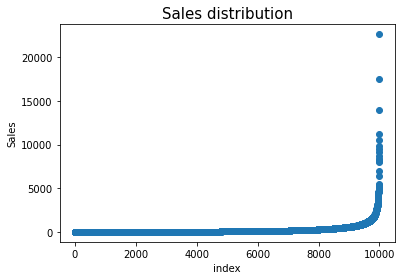

In [ ]:
plt.scatter(range(dataset.shape[0]), np.sort(dataset['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution",size=15)


In [ ]:
#sns.histplot(dataset['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Sales')

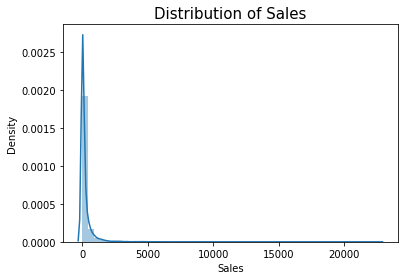

In [12]:
sns.distplot(dataset['Sales'])
plt.title('Distribution of Sales',size=15)

The Superstore’s sales distribution is far from a normal distribution, and it has a positive long thin tail, the mass of the distribution is concentrated on the left of the figure and the tail sales distribution far exceeds the tails of the normal distribution.

In [15]:
print('Skewness of Sales date:',round(dataset['Sales'].skew(),2))
print('Kurtosis of Sales date:',round(dataset['Sales'].kurt(),2))

Skewness of Sales date: 12.97
Kurtosis of Sales date: 305.31


As the Skewness is positive so Sales data is positively skewed.

## **Profit Variable Analysis**

In [16]:
dataset['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

Here the max profit value differs a lot from the rest of the statistical values. So, there might be some outliers in the dataset.

Text(0.5, 1.0, 'Profit distribution')

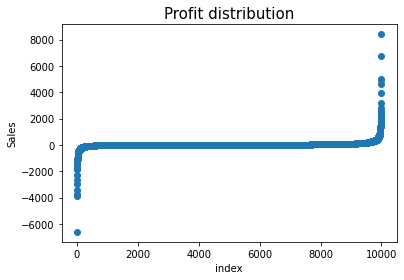

In [17]:
plt.scatter(range(dataset.shape[0]), np.sort(dataset['Profit'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Profit distribution",size=15)


In [18]:
print('Skewness of Sales date:',round(dataset['Profit'].skew(),2))
print('Kurtosis of Sales date:',round(dataset['Profit'].kurt(),2))

Skewness of Sales date: 7.56
Kurtosis of Sales date: 397.19


The Superstore’s Profit distribution has both a positive tail and negative tail. However, the positive tail is longer than the negative tail. 

So the distribution is positive skewed, and the data are heavy-tailed or profusion of outliers.

## **Isolation Forest**

## Univariate Anomaly Detection on Sales

In [20]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(dataset['Sales'].values.reshape(-1, 1))
dataset['anomaly_score_univariate_sales'] = isolation_forest.decision_function(dataset['Sales'].values.reshape(-1, 1))
dataset['outlier_univariate_sales'] = isolation_forest.predict(dataset['Sales'].values.reshape(-1, 1))

In [24]:
# Displaying the samples those are anomaly as per the Sales data.
#dataset[dataset['outlier_univariate_sales']==-1]

In [27]:
dataset.sort_values('anomaly_score_univariate_sales')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,-0.114759,-1
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,-0.113586,-1
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,-0.112415,-1
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,-0.112415,-1
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,-0.110662,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8531,8532,CA-2016-156748,2016-11-30,2016-12-06,Standard Class,BS-11755,Bruce Stewart,Consumer,United States,Detroit,Michigan,48227,Central,OFF-PA-10002713,Office Supplies,Paper,"Adams Phone Message Book, 200 Message Capacity...",13.760,2,0.0,6.3296,0.372134,1
3378,3379,CA-2017-142867,2017-03-17,2017-03-21,Standard Class,PO-19180,Philisse Overcash,Home Office,United States,Houston,Texas,77095,Central,OFF-BI-10003166,Office Supplies,Binders,GBC Plasticlear Binding Covers,13.776,6,0.8,-22.0416,0.372134,1
7936,7937,CA-2017-166093,2017-08-17,2017-08-24,Standard Class,RW-19540,Rick Wilson,Corporate,United States,Brentwood,California,94513,West,OFF-BI-10000174,Office Supplies,Binders,Wilson Jones Clip & Carry Folder Binder Tool f...,13.920,3,0.2,4.8720,0.372134,1
1962,1963,CA-2017-110905,2017-09-10,2017-09-15,Second Class,RW-19690,Robert Waldorf,Consumer,United States,Springfield,Missouri,65807,Central,OFF-BI-10002954,Office Supplies,Binders,Newell 3-Hole Punched Plastic Slotted Magazine...,13.710,3,0.0,6.5808,0.372134,1


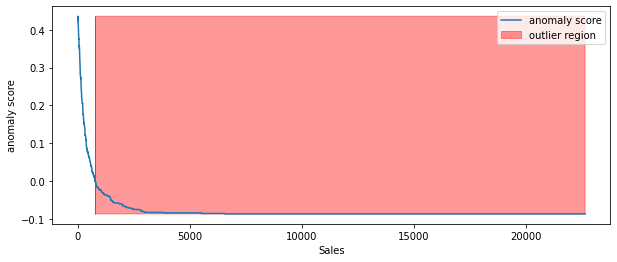

In [30]:
xx = np.linspace(dataset['Sales'].min(), dataset['Sales'].max(), len(dataset)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

According to the above results and visualization, it seems that sales that exceeds 1500 would be definitely considered as an outlier.

## Univariate Anomaly Detection on Profit

In [28]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(dataset['Profit'].values.reshape(-1, 1))
dataset['anomaly_score_univariate_Profit'] = isolation_forest.decision_function(dataset['Profit'].values.reshape(-1, 1))
dataset['outlier_univariate_Profit'] = isolation_forest.predict(dataset['Profit'].values.reshape(-1, 1))

In [29]:
dataset.sort_values('anomaly_score_univariate_Profit')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_Profit,outlier_univariate_Profit
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,-0.113586,-1,-0.086313,-1
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,-0.112415,-1,-0.086313,-1
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,-0.112415,-1,-0.083452,-1
9039,9040,CA-2016-117121,2016-12-17,2016-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,Michigan,48205,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700,-0.110662,-1,-0.083452,-1
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,-0.110662,-1,-0.083452,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,7615,CA-2015-113740,2015-08-24,2015-08-28,Second Class,SC-20380,Shahid Collister,Consumer,United States,New York City,New York,10035,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",14.910,3,0.0,4.6221,0.367777,1,0.436940,1
9887,9888,CA-2017-169607,2017-10-12,2017-10-15,First Class,CA-12265,Christina Anderson,Consumer,United States,New York City,New York,10024,East,OFF-PA-10000477,Office Supplies,Paper,Xerox 1952,9.960,2,0.0,4.6812,0.364035,1,0.436940,1
9312,9313,CA-2017-148642,2017-03-06,2017-03-12,Standard Class,DW-13540,Don Weiss,Consumer,United States,Dallas,Texas,75220,Central,OFF-AR-10000588,Office Supplies,Art,Newell 345,63.488,4,0.2,4.7616,0.335760,1,0.436940,1
688,689,CA-2017-161480,2017-12-25,2017-12-29,Standard Class,RA-19285,Ralph Arnett,Consumer,United States,New York City,New York,10035,East,FUR-BO-10004015,Furniture,Bookcases,"Bush Andora Bookcase, Maple/Graphite Gray Finish",191.984,2,0.2,4.7996,0.271534,1,0.436940,1


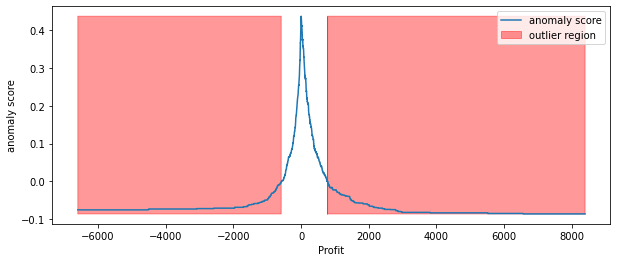

In [32]:
xx = np.linspace(dataset['Profit'].min(), dataset['Profit'].max(), len(dataset)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show();

According to the above results and visualization, it seems Profit that is below -100 or exceeds 100 would be considered as an outlier.

In [36]:
dataset[(dataset['outlier_univariate_sales']==-1) & (dataset['outlier_univariate_Profit']==-1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_Profit,outlier_univariate_Profit
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522,-0.030031,-1,-0.067129,-1
165,166,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,Texas,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920,-0.107167,-1,-0.058768,-1
318,319,CA-2014-164973,2014-11-04,2014-11-09,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,New York,10024,East,TEC-MA-10002927,Technology,Machines,Canon imageCLASS MF7460 Monochrome Digital Las...,3991.980,2,0.0,1995.9900,-0.053123,-1,-0.062019,-1
353,354,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,New York,10009,East,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,4355.168,4,0.2,1415.4296,-0.059139,-1,-0.039934,-1
509,510,CA-2015-145352,2015-03-16,2015-03-22,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,Georgia,30318,South,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750,-0.095043,-1,-0.082310,-1
515,516,CA-2017-127432,2017-01-22,2017-01-27,Standard Class,AD-10180,Alan Dominguez,Home Office,United States,Great Falls,Montana,59405,West,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770,-0.030031,-1,-0.039392,-1
683,684,US-2017-168116,2017-11-04,2017-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,-0.107167,-1,-0.073315,-1
994,995,CA-2014-117639,2014-05-21,2014-05-25,Standard Class,MW-18235,Mitch Willingham,Corporate,United States,Virginia Beach,Virginia,23464,South,OFF-BI-10003925,Office Supplies,Binders,Fellowes PB300 Plastic Comb Binding Machine,2715.930,7,0.0,1276.4871,-0.010176,-1,-0.036689,-1
1085,1086,US-2016-143819,2016-03-01,2016-03-05,Standard Class,KD-16270,Karen Daniels,Consumer,United States,Yonkers,New York,10701,East,TEC-MA-10003979,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,4899.930,7,0.0,2400.9657,-0.080832,-1,-0.070977,-1
1454,1455,CA-2016-133711,2016-11-26,2016-11-29,First Class,MC-17425,Mark Cousins,Corporate,United States,Mobile,Alabama,36608,South,TEC-MA-10000010,Technology,Machines,Hewlett-Packard Deskjet 3050a All-in-One Color...,3040.000,8,0.0,1459.2000,-0.029502,-1,-0.046576,-1


The above two visualizations show the anomaly scores and highlighted the regions where the outliers are. As expected, the anomaly score reflects the shape of the underlying distribution and the outlier regions correspond to low probability areas.

## Multivariate Anomaly Detection

using the Sales and Profit variables, we are going to build an unsupervised multivariate anomaly detection model.

Text(0.5, 1.0, 'Sales & Profit correlation')

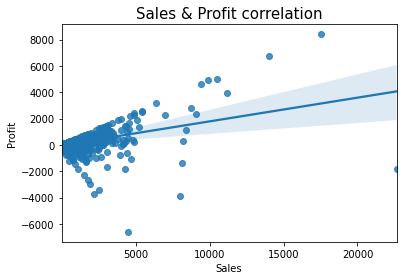

In [40]:
sns.regplot(x='Sales',y='Profit',data=dataset)
plt.title('Sales & Profit correlation',size=15)

From the above correlation chart, we can see that some of the data points are obvious outliers such as extreme low and extreme high values.

In [42]:
minmax=MinMaxScaler(feature_range=(0, 1))
x=minmax.fit_transform(dataset[['Sales','Profit']])

In [44]:
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(x)

# predict raw anomaly score
dataset['multivariate_anomaly_score'] = clf.decision_function(x)
        
# prediction of a datapoint category outlier or inlier
dataset['multivariate_outlier'] = clf.predict(x)

In [45]:
dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_Profit,outlier_univariate_Profit,multivariate_anomaly_score,multivariate_outlier
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.270091,1,0.375277,1,0.322497,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.173766,1,0.202326,1,0.195553,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.368750,1,0.432544,1,0.394839,1
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,0.147297,1,0.055174,1,0.064948,1
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.361661,1,0.433797,1,0.391503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,0.365641,1,0.435978,1,0.390378,1
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,0.323414,1,0.420621,1,0.375232,1
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,0.275815,1,0.410121,1,0.333693,1
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,0.359376,1,0.425174,1,0.384195,1


In [46]:
dataset.sort_values('multivariate_anomaly_score')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_Profit,outlier_univariate_Profit,multivariate_anomaly_score,multivariate_outlier
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,-0.113586,-1,-0.086313,-1,-0.127565,-1
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,-0.112415,-1,-0.086313,-1,-0.125249,-1
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,-0.112415,-1,-0.083452,-1,-0.123516,-1
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,-0.110662,-1,-0.083452,-1,-0.123516,-1
9039,9040,CA-2016-117121,2016-12-17,2016-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,Michigan,48205,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700,-0.110662,-1,-0.083452,-1,-0.122939,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,3426,CA-2015-153381,2015-09-24,2015-09-28,Standard Class,DE-13255,Deanra Eno,Home Office,United States,Dubuque,Iowa,52001,Central,OFF-BI-10001525,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",15.240,4,0.0,6.8580,0.369834,1,0.432544,1,0.395848,1
2688,2689,CA-2015-153220,2015-11-12,2015-11-14,First Class,YC-21895,Yoseph Carroll,Corporate,United States,Los Angeles,California,90032,West,OFF-PA-10003016,Office Supplies,Paper,"Adams ""While You Were Out"" Message Pads",15.700,5,0.0,7.0650,0.368498,1,0.433711,1,0.395848,1
7392,7393,CA-2017-147844,2017-05-02,2017-05-06,Standard Class,DD-13570,Dorothy Dickinson,Consumer,United States,Los Angeles,California,90049,West,OFF-PA-10003016,Office Supplies,Paper,"Adams ""While You Were Out"" Message Pads",15.700,5,0.0,7.0650,0.368498,1,0.433711,1,0.395848,1
420,421,CA-2017-110478,2017-03-04,2017-03-09,Standard Class,SP-20860,Sung Pak,Corporate,United States,Los Angeles,California,90045,West,OFF-EN-10000483,Office Supplies,Envelopes,"White Envelopes, White Envelopes with Clear Po...",15.250,1,0.0,7.0150,0.369834,1,0.433839,1,0.395848,1


Text(0, 0.5, 'Profit')

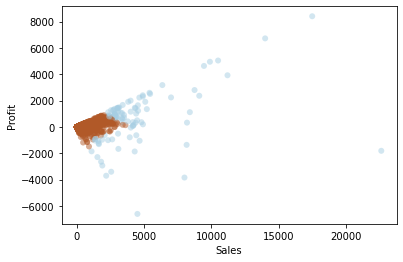

In [49]:
plt.scatter(dataset['Sales'], dataset['Profit'],
            c=dataset.multivariate_outlier, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Paired', 10))
plt.xlabel('Sales')
plt.ylabel('Profit')


In [53]:
dataset[(dataset['outlier_univariate_sales']==1) & (dataset['outlier_univariate_Profit']==1) & (dataset['multivariate_outlier']==-1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_Profit,outlier_univariate_Profit,multivariate_anomaly_score,multivariate_outlier
5530,5531,CA-2017-160885,2017-12-02,2017-12-06,Standard Class,JK-16090,Juliana Krohn,Consumer,United States,Omaha,Nebraska,68104,Central,TEC-PH-10001795,Technology,Phones,ClearOne CHATAttach 160 - speaker phone,2479.96,4,0.0,743.988,0.000071,1,0.008397,1,-0.003456,-1


## **Conclusion**

Here we can see that, there is only one sample for which the univariate anomaly detection couldn't do the work properly. So in oder to get the correct anomaly detection, the multivariate anomaly detection method must be adopted.